In [1]:
import pandas as pd       #data processing
import numpy as np        #linear algebra
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')

In [2]:
data=pd.read_csv("nyc_taxi_trip_duration.csv")

In [3]:
data.shape

(729322, 11)

In [4]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [5]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [7]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
data.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [9]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [10]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [11]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour
data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [12]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [16]:
data['pickup_timeofday'] = data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday'] = data['dropoff_hour'].apply(time_of_day)

In [18]:
pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------  122.9/125.4 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 921.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated package

In [19]:
from geopy.distance import great_circle

In [20]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [24]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis=1)

In [25]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,0,0,16,16,2,2,Evening,Evening,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Friday,4,4,23,23,3,3,Late night,Late night,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,6,6,17,18,2,2,Evening,Evening,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Tuesday,1,1,9,10,1,1,Morning,Morning,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,2,2,6,6,2,2,Morning,Morning,4.328540


<Axes: xlabel='trip_duration', ylabel='Count'>

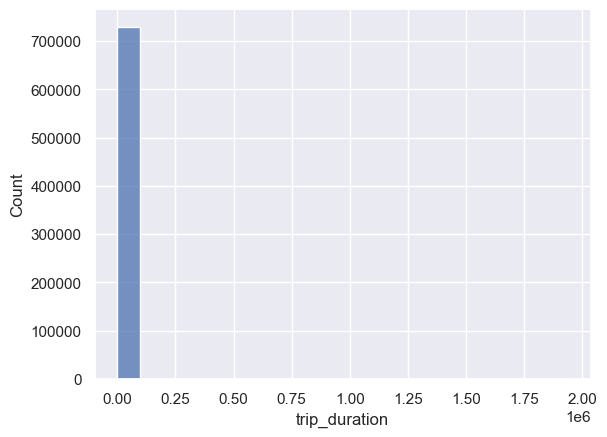

In [26]:
sns.histplot(data['trip_duration'],kde=False,bins=20)

<Axes: >

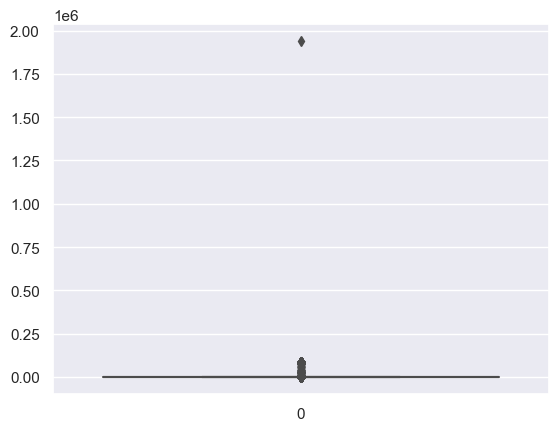

In [28]:
sns.boxplot(data['trip_duration'])

In [29]:
data['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

In [30]:
data.drop(data[data['trip_duration'] == 1939736].index, inplace = True)

<Axes: xlabel='vendor_id', ylabel='count'>

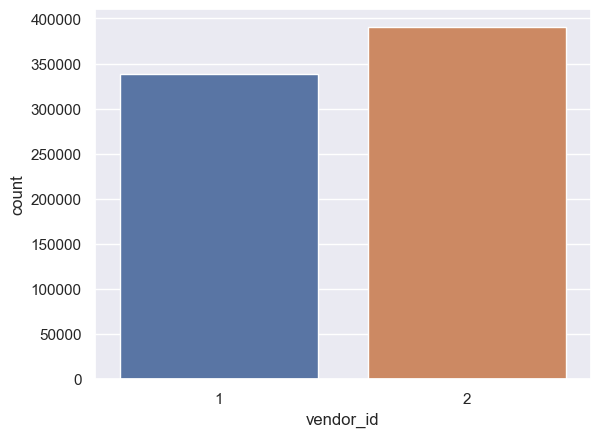

In [31]:
sns.countplot(x='vendor_id',data=data)

In [32]:
data.passenger_count.value_counts()

passenger_count
1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: count, dtype: int64

<Axes: xlabel='passenger_count', ylabel='count'>

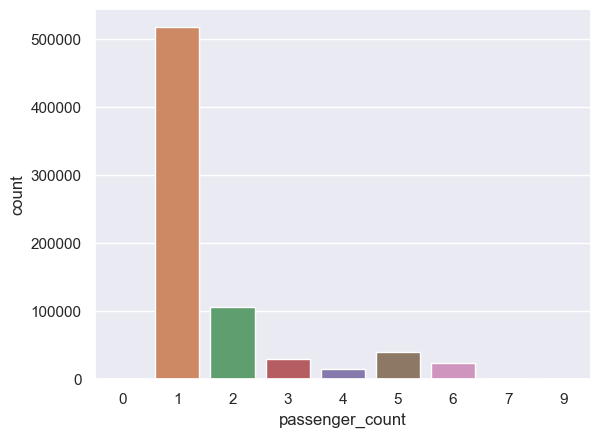

In [33]:
sns.countplot(x='passenger_count',data=data)

In [34]:
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

In [35]:
data.passenger_count.value_counts()

passenger_count
1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: count, dtype: int64

In [36]:
data['store_and_fwd_flag'].value_counts(normalize=True)

store_and_fwd_flag
N    0.994463
Y    0.005537
Name: proportion, dtype: float64

In [37]:
data['distance'].value_counts()

distance
0.000000    2893
0.000424      20
0.000424      19
0.000424      16
0.001273      11
            ... 
0.977650       1
0.925223       1
4.112012       1
1.107789       1
5.945846       1
Name: count, Length: 726217, dtype: int64

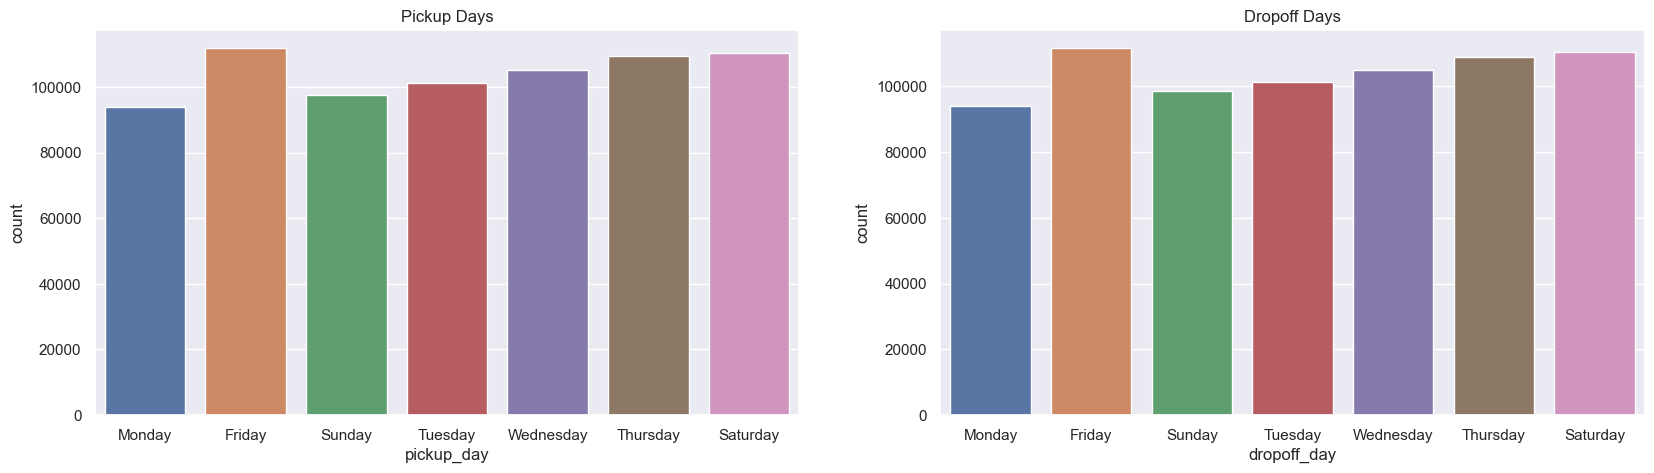

In [38]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=data,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=data,ax=ax2)

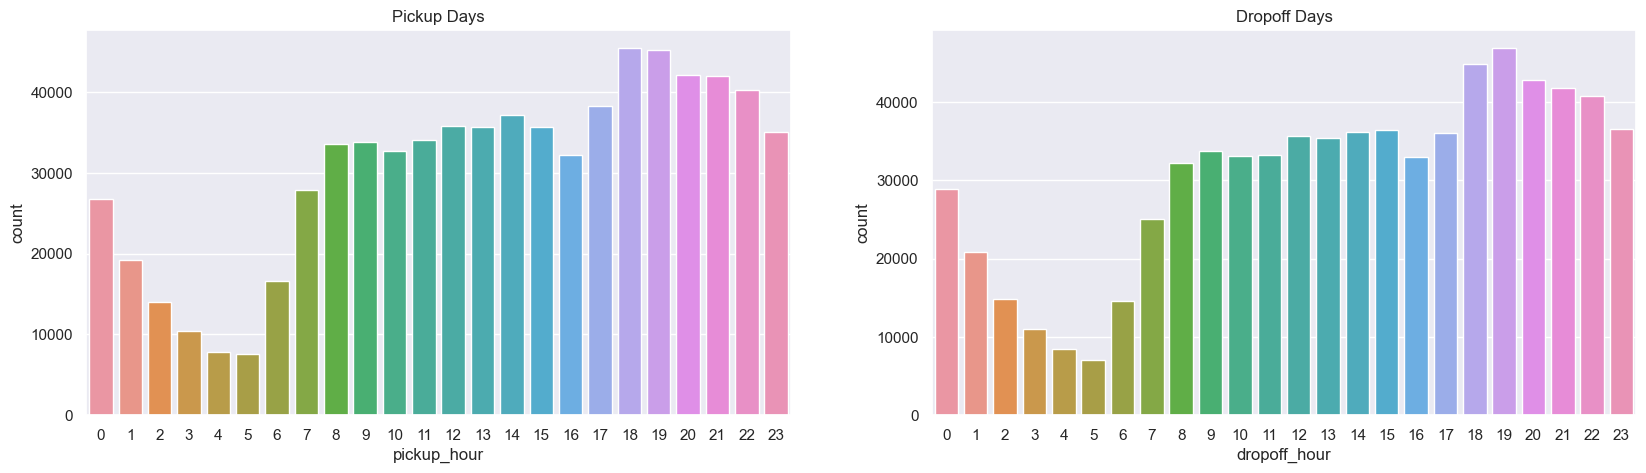

In [39]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax10)

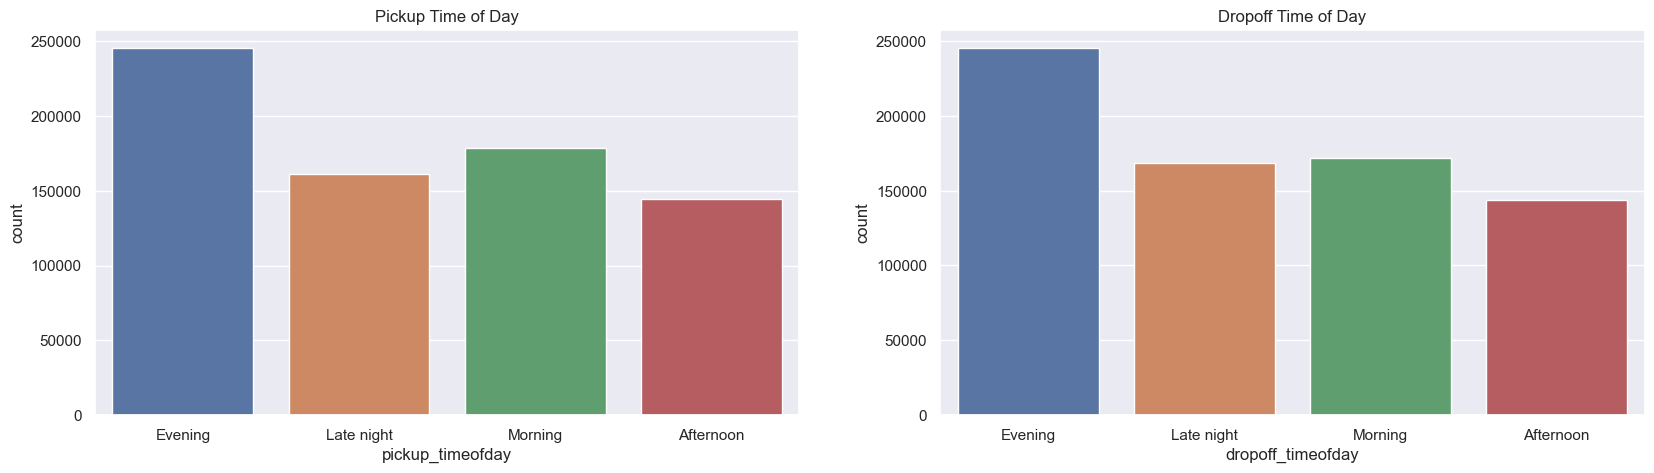

In [40]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=data,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=data,ax=ax4)

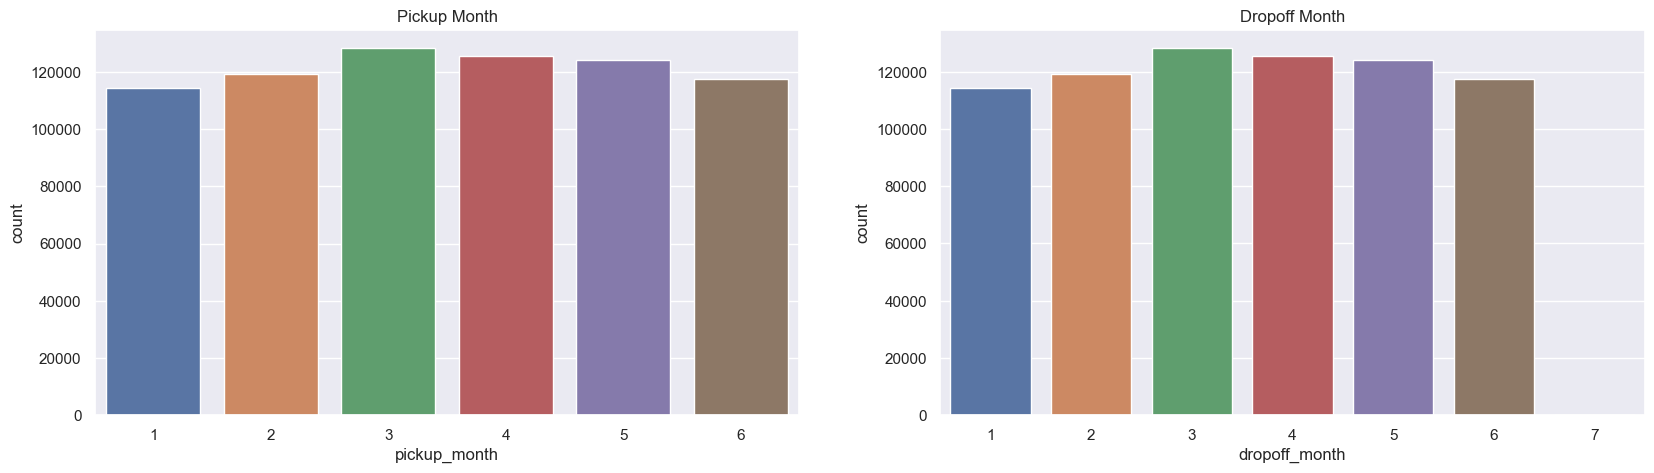

In [41]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax12)

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

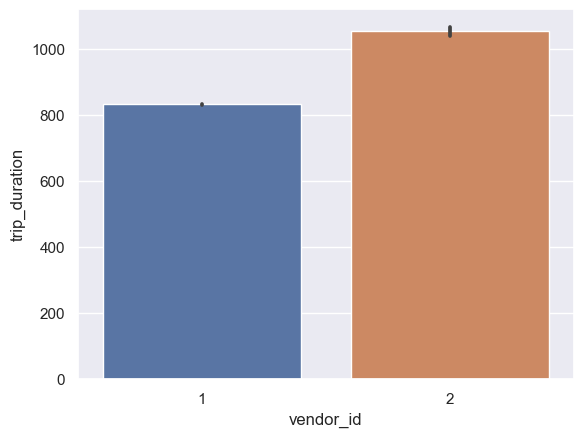

In [42]:
sns.barplot(y='trip_duration',x='vendor_id',data=data,estimator=np.mean)

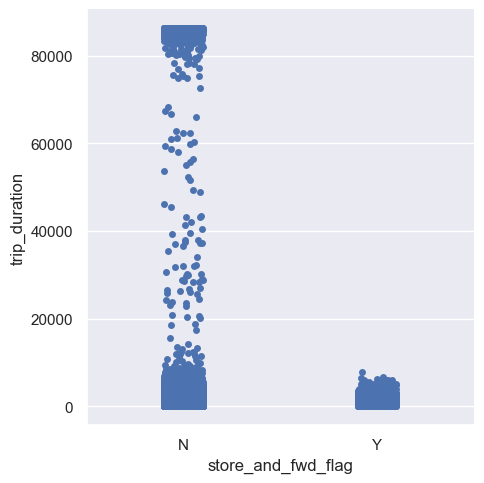

In [44]:
sns.catplot(y='trip_duration', x='store_and_fwd_flag', data=data, kind='strip')

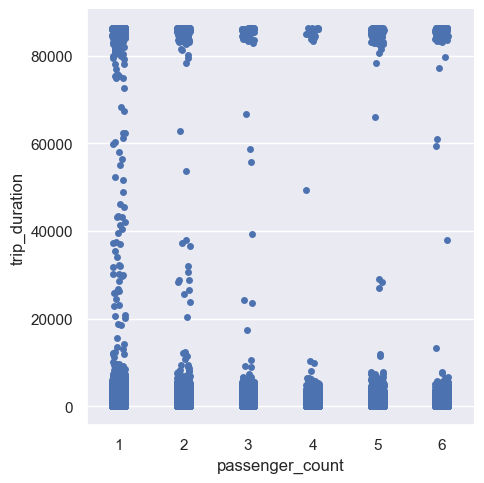

In [47]:
sns.catplot(y='trip_duration', x='passenger_count', data=data, kind='strip')

<Axes: xlabel='pickup_hour', ylabel='trip_duration'>

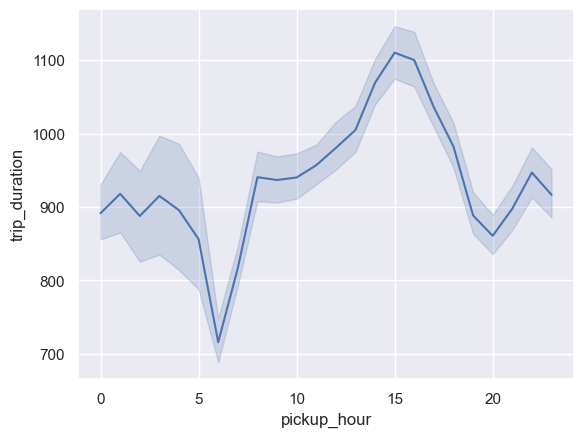

In [51]:
sns.lineplot(x='pickup_hour', y='trip_duration', data=data)
             

<Axes: xlabel='pickup_timeofday', ylabel='trip_duration'>

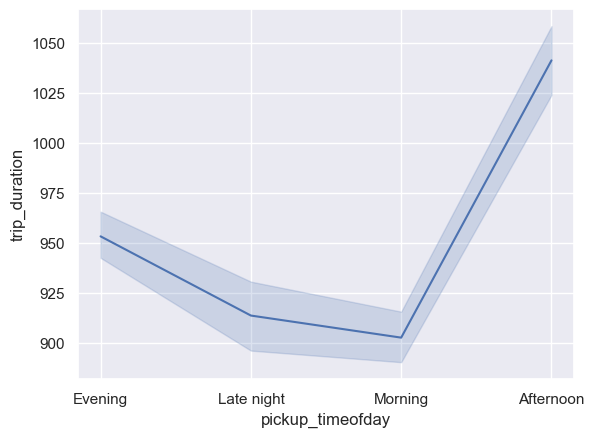

In [52]:
sns.lineplot(x='pickup_timeofday', y='trip_duration', data=data)

<Axes: xlabel='pickup_day_no', ylabel='trip_duration'>

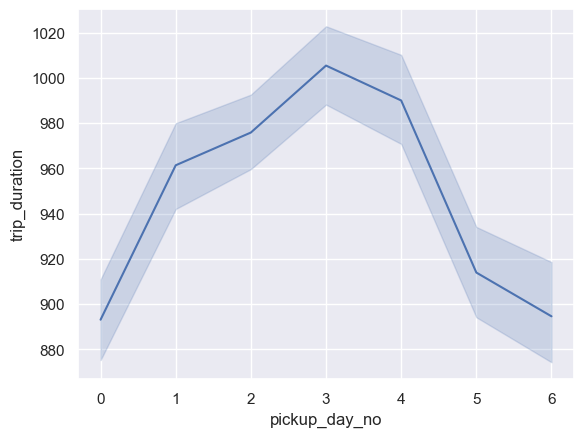

In [54]:
sns.lineplot(x='pickup_day_no', y='trip_duration', data=data)

<Axes: xlabel='pickup_month', ylabel='trip_duration'>

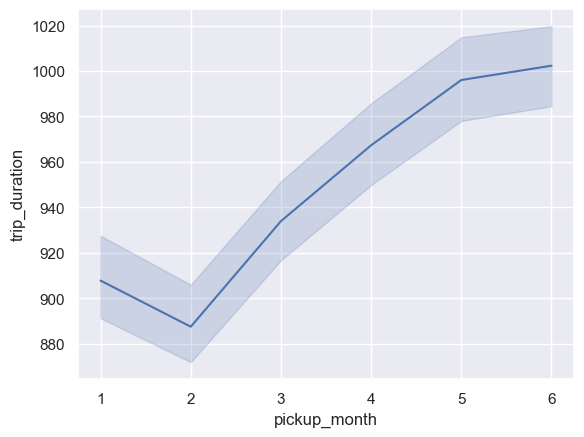

In [55]:
sns.lineplot(x='pickup_month', y='trip_duration', data=data)

<Axes: xlabel='vendor_id', ylabel='distance'>

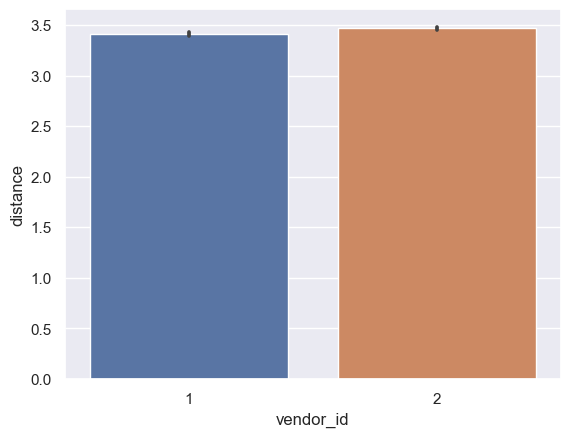

In [56]:
sns.barplot(y='distance',x='vendor_id',data=data,estimator=np.mean)

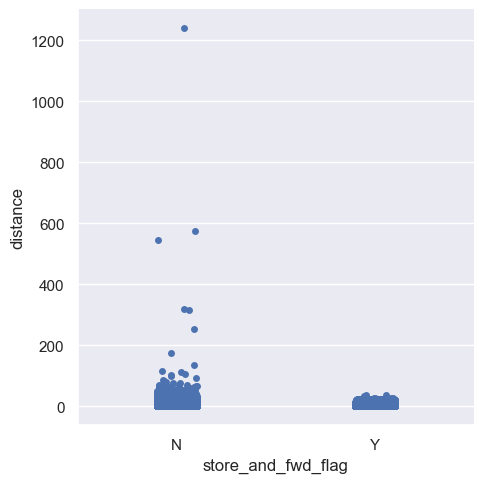

In [58]:
sns.catplot(y='distance', x='store_and_fwd_flag', data=data, kind='strip')

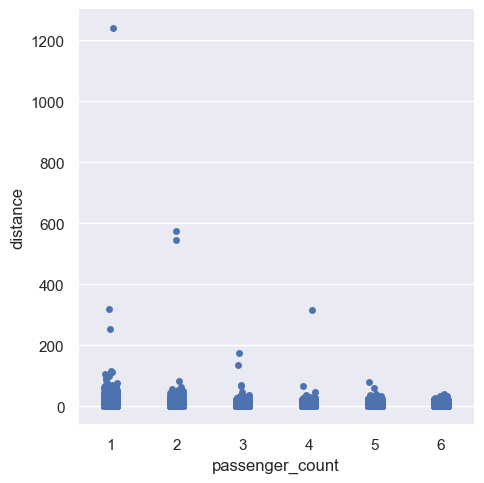

In [59]:
sns.catplot(y='distance', x='passenger_count', data=data, kind='strip')

<Axes: xlabel='pickup_day_no', ylabel='distance'>

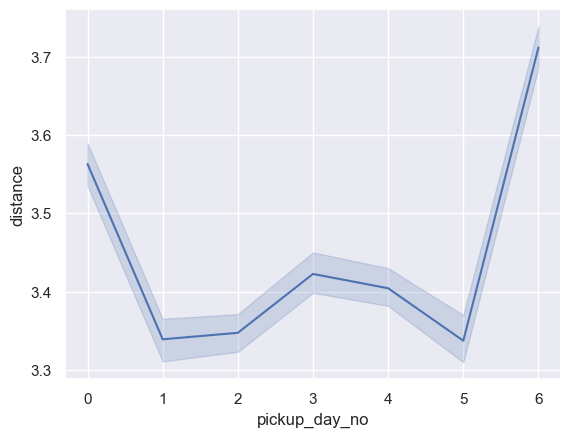

In [60]:
sns.lineplot(x='pickup_day_no',y='distance',data=data)

<Axes: xlabel='pickup_hour', ylabel='distance'>

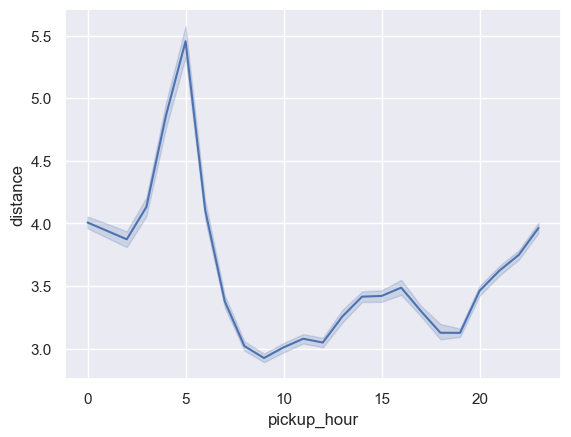

In [61]:
sns.lineplot(x='pickup_hour',y='distance',data=data)


<Axes: xlabel='pickup_timeofday', ylabel='distance'>

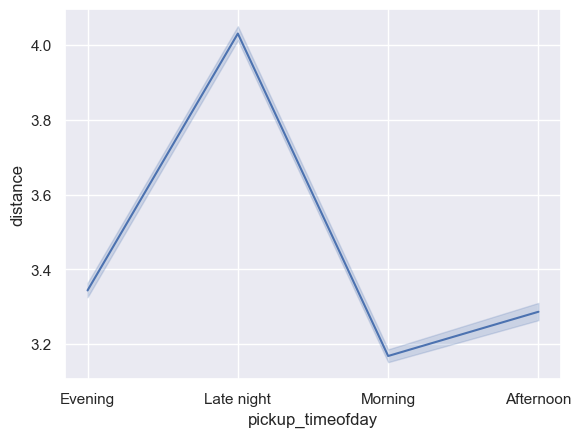

In [62]:
sns.lineplot(x='pickup_timeofday',y='distance',data=data)

<Axes: xlabel='pickup_month', ylabel='distance'>

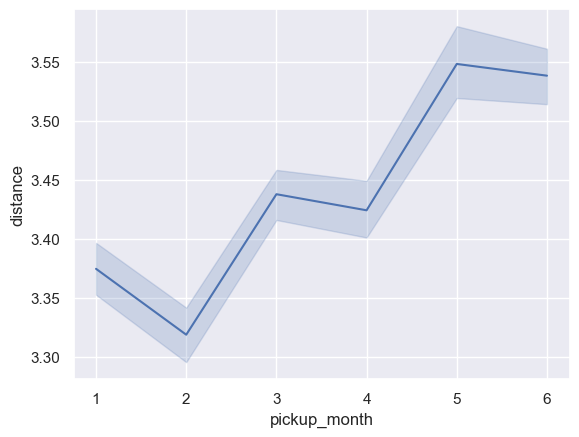

In [63]:
sns.lineplot(x='pickup_month',y='distance',data=data)

<Axes: xlabel='vendor_id', ylabel='passenger_count'>

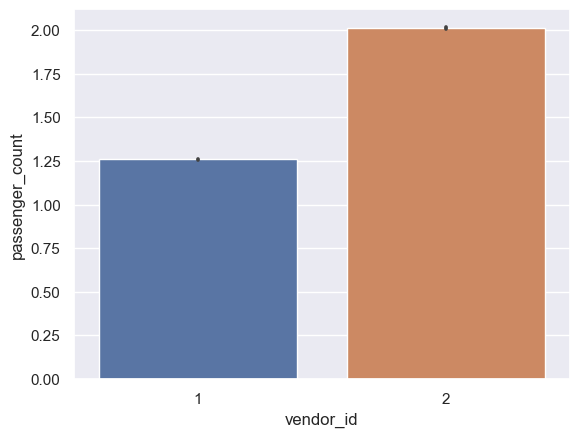

In [64]:
sns.barplot(y='passenger_count',x='vendor_id',data=data)

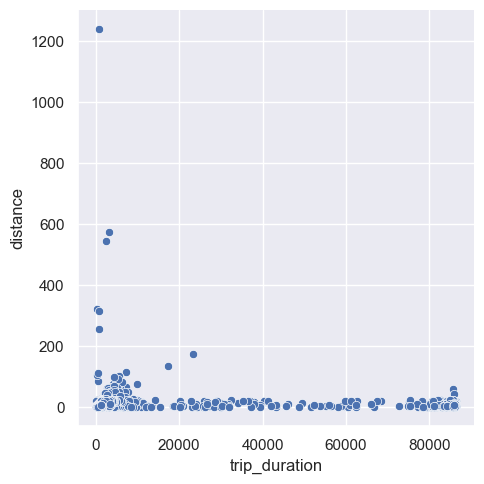

In [65]:
sns.relplot(y=data.distance,x='trip_duration',data=data)